# Textual Emotion Recognition


In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import os, sys
module_path = os.path.abspath(os.path.join('..', '..')) # or the path to your source code
sys.path.insert(0, module_path)
from src.recognizers import TextEmotionRecognizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix"):
    """
    Plots a confusion matrix with percentages as colors 
    and absolute counts shown in parentheses.

    Args:
        y_true (list/array): Ground truth labels.
        y_pred (list/array): Predicted labels.
        labels (list): List of class labels (in order). If None, uses unique labels from y_true.
        title (str): Title of the plot.
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if labels is None:
        labels = np.unique(y_true)

    # Normalize row-wise to percentages
    cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    cm_percent = np.nan_to_num(cm_percent)  # handle divide by zero

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm_percent, interpolation="nearest", cmap=plt.cm.Blues)

    # Title + colorbar
    ax.set_title(title)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="Percentage")

    # Axis labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Text in cells: show percent + count
    thresh = cm_percent.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = f"{cm_percent[i, j]*100:.1f}%\n({cm[i, j]})"
            ax.text(
                j, i, text,
                ha="center", va="center",
                color="white" if cm_percent[i, j] > thresh else "black"
            )

    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    plt.tight_layout()
    plt.show()


#llm_model="deepseek-r1:1.5b"
                 #llm_model="qwen"
                 #llm_model="phi4-mini"
                 #llm_model="stablelm2:latest"
                 #llm_model="tinyllama:latest"
                 llm_model="openhermes:latest"
                 #llm_model="openhermes2.5-mistral:latest"
                 #llm_model="mistral:7b"
                 #llm_model="dolphin-mistral:latest"
                 #llm_model="ALIENTELLIGENCE/emotionalintelligenceanalysis:latest"

## MELD

100%|██████████| 2610/2610 [14:06<00:00,  3.08it/s]


              precision    recall  f1-score   support

       angry       0.33      0.34      0.34       345
     disgust       0.13      0.18      0.15        68
        fear       0.08      0.18      0.11        50
       happy       0.39      0.16      0.23       402
     neutral       0.71      0.14      0.23      1256
         sad       0.34      0.19      0.24       208
    surprise       0.14      0.76      0.24       281

    accuracy                           0.24      2610
   macro avg       0.30      0.28      0.22      2610
weighted avg       0.49      0.24      0.24      2610



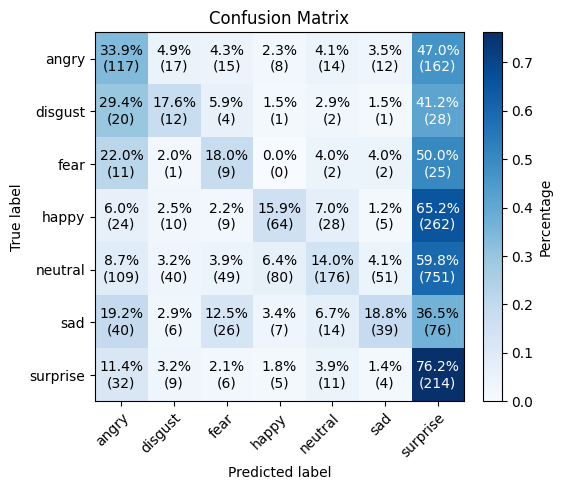

In [3]:
ter = TextEmotionRecognizer("gemma3:4b")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 2610/2610 [23:26<00:00,  1.86it/s] 


              precision    recall  f1-score   support

       angry       0.41      0.27      0.33       345
     disgust       0.16      0.21      0.18        68
        fear       0.12      0.26      0.16        50
       happy       0.59      0.13      0.22       402
     neutral       0.59      0.67      0.63      1256
         sad       0.52      0.17      0.25       208
    surprise       0.20      0.42      0.27       281

    accuracy                           0.45      2610
   macro avg       0.37      0.30      0.29      2610
weighted avg       0.50      0.45      0.44      2610



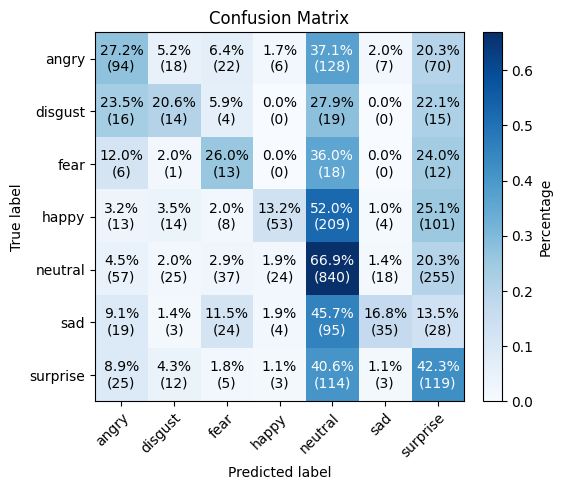

In [3]:
ter = TextEmotionRecognizer("gemma2:latest")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 2610/2610 [18:49<00:00,  2.31it/s] 


              precision    recall  f1-score   support

       angry       0.33      0.37      0.35       345
     disgust       0.33      0.06      0.10        68
        fear       0.16      0.12      0.14        50
       happy       0.45      0.13      0.21       402
     neutral       0.60      0.43      0.50      1256
         sad       0.15      0.37      0.21       208
    surprise       0.17      0.39      0.23       281

    accuracy                           0.35      2610
   macro avg       0.31      0.27      0.25      2610
weighted avg       0.44      0.35      0.37      2610



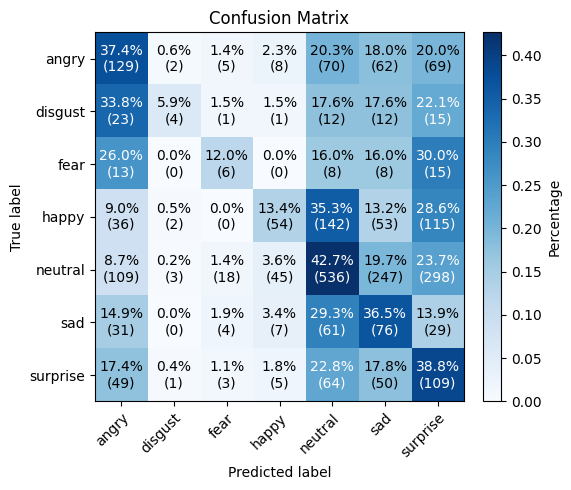

In [3]:
ter = TextEmotionRecognizer("gemma:latest")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 2610/2610 [19:23<00:00,  2.24it/s] 


              precision    recall  f1-score   support

       angry       0.41      0.26      0.32       345
     disgust       0.26      0.13      0.17        68
        fear       0.09      0.14      0.11        50
       happy       0.34      0.44      0.38       402
     neutral       0.62      0.59      0.60      1256
         sad       0.33      0.38      0.35       208
    surprise       0.34      0.38      0.36       281

    accuracy                           0.46      2610
   macro avg       0.34      0.33      0.33      2610
weighted avg       0.47      0.46      0.46      2610



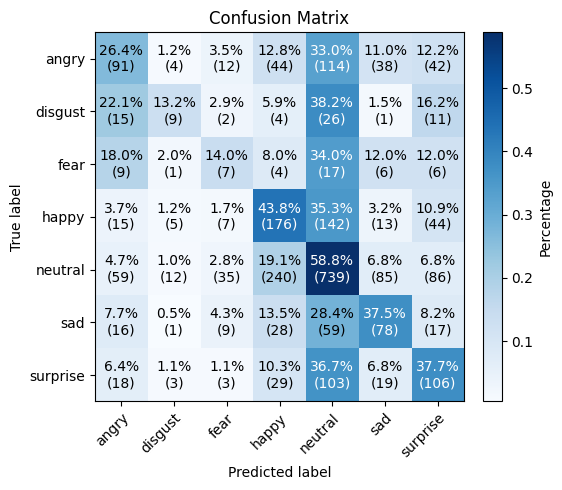

In [3]:
#neural-chat, llamas, qwen weak

ter = TextEmotionRecognizer("glm4")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

In [ ]:
ter = TextEmotionRecognizer("mistral")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

  4%|▍         | 101/2610 [02:23<38:53,  1.08it/s] 

In [ ]:
ter = TextEmotionRecognizer("qwen3")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

  0%|          | 3/2610 [00:24<6:24:56,  8.86s/it]

100%|██████████| 2610/2610 [10:52<00:00,  4.00it/s] 


              precision    recall  f1-score   support

       angry       0.43      0.09      0.15       345
     disgust       0.80      0.06      0.11        68
        fear       0.00      0.00      0.00        50
       happy       0.27      0.09      0.13       402
     neutral       0.50      0.93      0.65      1256
         sad       0.36      0.15      0.22       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.49      2610
   macro avg       0.34      0.19      0.18      2610
weighted avg       0.39      0.49      0.38      2610



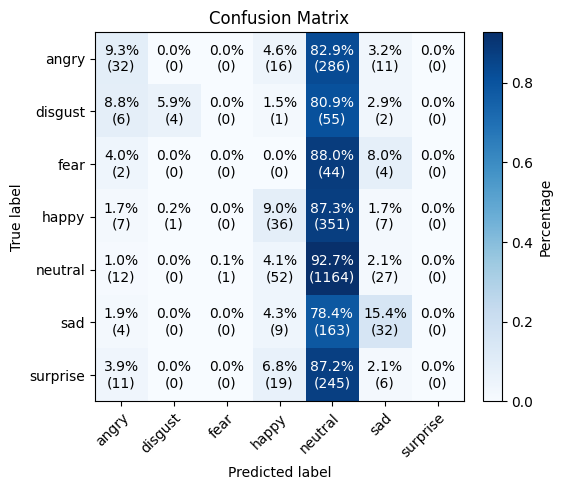

In [3]:
ter = TextEmotionRecognizer("qwen")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 2610/2610 [18:07<00:00,  2.40it/s] 


              precision    recall  f1-score   support

       angry       0.34      0.27      0.30       345
     disgust       0.16      0.28      0.20        68
        fear       0.07      0.08      0.07        50
       happy       0.52      0.10      0.16       402
     neutral       0.57      0.55      0.56      1256
         sad       0.28      0.25      0.26       208
    surprise       0.19      0.45      0.26       281

    accuracy                           0.39      2610
   macro avg       0.30      0.28      0.26      2610
weighted avg       0.45      0.39      0.39      2610



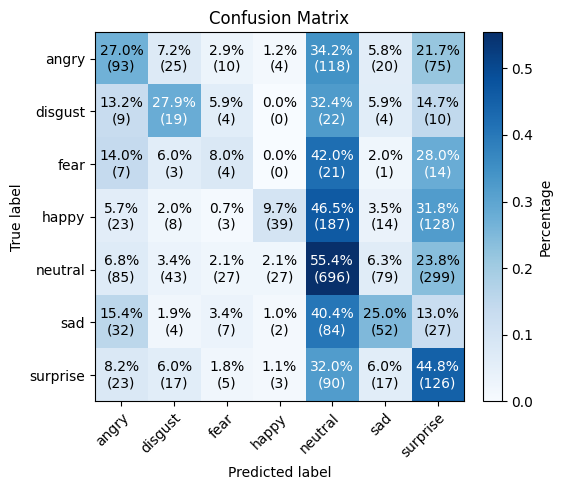

In [3]:
ter = TextEmotionRecognizer("ALIENTELLIGENCE/emotionalintelligenceanalysis:latest")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

In [ ]:
ter = TextEmotionRecognizer("phi4")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

  1%|▏         | 35/2610 [02:30<7:15:50, 10.16s/it]

100%|██████████| 2610/2610 [4:23:38<00:00,  6.06s/it]     


              precision    recall  f1-score   support

       angry       0.69      0.03      0.05       345
     disgust       0.70      0.10      0.18        68
        fear       0.15      0.04      0.06        50
       happy       0.80      0.01      0.02       402
     neutral       0.50      0.98      0.66      1256
         sad       0.38      0.10      0.16       208
    surprise       0.64      0.11      0.19       281

    accuracy                           0.50      2610
   macro avg       0.55      0.20      0.19      2610
weighted avg       0.57      0.50      0.37      2610



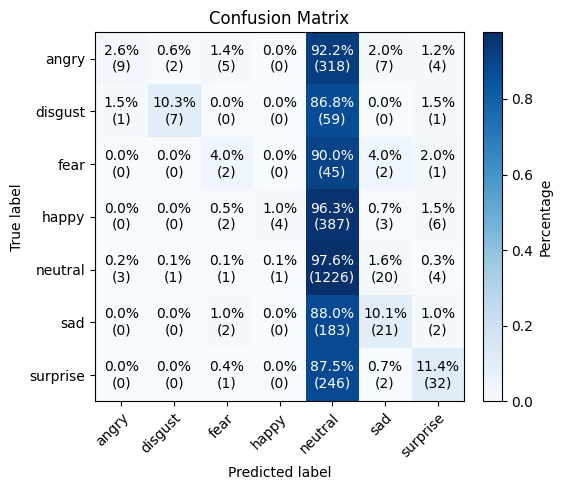

In [3]:
ter = TextEmotionRecognizer("mistral")
df = pd.read_csv("MELD_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

## IEMOCAP

In [6]:
ter = TextEmotionRecognizer("qwen")
df = pd.read_csv("IEMOCAP_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)
print(classification_report(df['label'], df['pred']))
print(confusion_matrix(df['label'], df['pred']))

100%|██████████| 4639/4639 [18:32<00:00,  4.17it/s]

              precision    recall  f1-score   support

       angry       0.77      0.14      0.24      1103
     disgust       0.00      0.00      0.00         2
        fear       0.00      0.00      0.00        40
       happy       0.30      0.12      0.17       595
     neutral       0.41      0.94      0.57      1708
         sad       0.63      0.16      0.25      1084
    surprise       0.00      0.00      0.00       107

    accuracy                           0.43      4639
   macro avg       0.30      0.19      0.18      4639
weighted avg       0.52      0.43      0.35      4639

[[ 156    1    0   37  857   52    0]
 [   0    0    0    0    1    1    0]
 [   0    0    0    0   39    1    0]
 [  12    0    0   72  499   12    0]
 [  22    0    0   58 1598   30    0]
 [   8    0    0   67  840  169    0]
 [   5    0    0   10   90    2    0]]


100%|██████████| 4639/4639 [35:10<00:00,  2.20it/s]


              precision    recall  f1-score   support

       angry       0.60      0.43      0.50      1103
     disgust       0.00      0.00      0.00         2
        fear       0.08      0.15      0.11        40
       happy       0.29      0.12      0.17       595
     neutral       0.49      0.47      0.48      1708
         sad       0.40      0.39      0.39      1084
    surprise       0.04      0.36      0.08       107

    accuracy                           0.39      4639
   macro avg       0.27      0.27      0.25      4639
weighted avg       0.46      0.39      0.41      4639



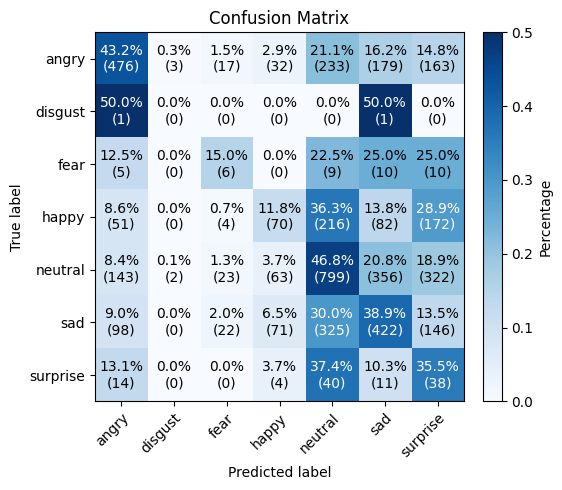

In [3]:
ter = TextEmotionRecognizer("gemma")
df = pd.read_csv("IEMOCAP_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 4639/4639 [43:06<00:00,  1.79it/s]  


              precision    recall  f1-score   support

       angry       0.68      0.39      0.49      1103
     disgust       0.00      0.00      0.00         2
        fear       0.07      0.38      0.12        40
       happy       0.40      0.12      0.19       595
     neutral       0.48      0.74      0.59      1708
         sad       0.71      0.15      0.25      1084
    surprise       0.05      0.31      0.09       107

    accuracy                           0.43      4639
   macro avg       0.34      0.30      0.25      4639
weighted avg       0.56      0.43      0.42      4639



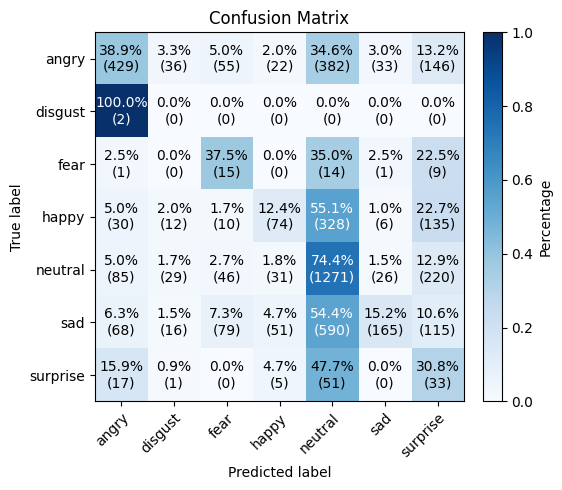

In [3]:
ter = TextEmotionRecognizer("gemma2")
df = pd.read_csv("IEMOCAP_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 4639/4639 [25:05<00:00,  3.08it/s]


              precision    recall  f1-score   support

       angry       0.56      0.42      0.48      1103
     disgust       0.01      0.50      0.02         2
        fear       0.02      0.15      0.04        40
       happy       0.25      0.17      0.20       595
     neutral       0.59      0.17      0.26      1708
         sad       0.60      0.20      0.30      1084
    surprise       0.03      0.71      0.07       107

    accuracy                           0.25      4639
   macro avg       0.30      0.33      0.20      4639
weighted avg       0.52      0.25      0.31      4639



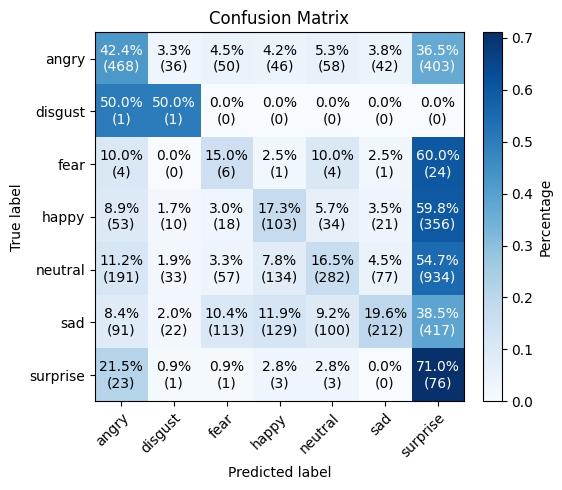

In [5]:
ter = TextEmotionRecognizer("gemma3:4b")
df = pd.read_csv("IEMOCAP_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 4639/4639 [33:54<00:00,  2.28it/s]


              precision    recall  f1-score   support

       angry       0.69      0.33      0.45      1103
     disgust       0.00      0.00      0.00         2
        fear       0.10      0.28      0.14        40
       happy       0.27      0.42      0.33       595
     neutral       0.52      0.61      0.56      1708
         sad       0.52      0.32      0.40      1084
    surprise       0.15      0.46      0.22       107

    accuracy                           0.45      4639
   macro avg       0.32      0.35      0.30      4639
weighted avg       0.52      0.45      0.46      4639



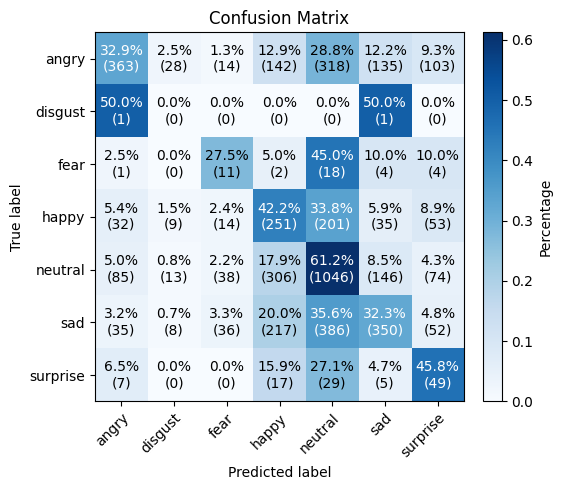

In [3]:
ter = TextEmotionRecognizer("glm4")
df = pd.read_csv("IEMOCAP_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

In [ ]:
ter = TextEmotionRecognizer("mistral")
df = pd.read_csv("IEMOCAP_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

 38%|███▊      | 1760/4639 [1:49:41<1:14:28,  1.55s/it]   

In [ ]:
ter = TextEmotionRecognizer("phi4")
df = pd.read_csv("IEMOCAP_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

In [6]:
df['pred'] = df['Utterance'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

KeyError: 'Utterance'

In [ ]:
ter = TextEmotionRecognizer("gemma3:4b")
df = pd.read_csv("TESS_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

Evaluate Whisper

In [5]:
import evaluate

# Load metrics
wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")

# Example reference + prediction
reference = df['Utterance'].to_list()
prediction = df["text"].to_list()

# Compute WER and CER
wer = wer_metric.compute(predictions=prediction, references=reference)
cer = cer_metric.compute(predictions=prediction, references=reference)

print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")

FileNotFoundError: Couldn't find a module script at /Users/krazmic/Documents/GitHub/Repos/EmoReA/emorea-backend/notebooks/text/wer/wer.py. Module 'wer' doesn't exist on the Hugging Face Hub either.

## EmoDB

100%|██████████| 454/454 [01:46<00:00,  4.26it/s]

              precision    recall  f1-score   support

       angry       0.25      0.02      0.03       127
     disgust       0.00      0.00      0.00        46
        fear       0.00      0.00      0.00        69
       happy       0.04      0.01      0.02        71
     neutral       0.18      0.96      0.31        79
         sad       0.12      0.02      0.03        62

    accuracy                           0.18       454
   macro avg       0.10      0.17      0.06       454
weighted avg       0.13      0.18      0.07       454



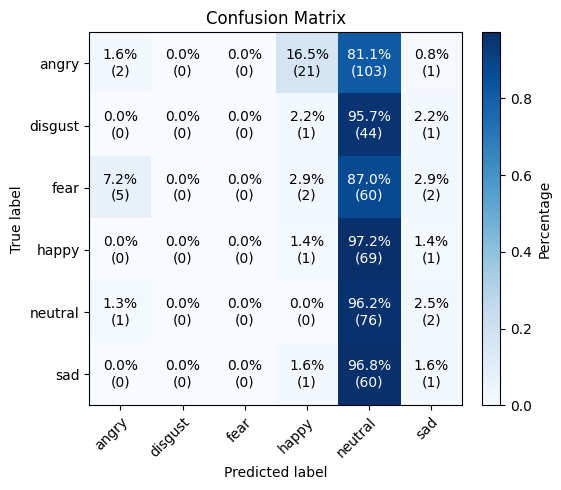

In [3]:

ter = TextEmotionRecognizer("qwen")
df = pd.read_csv("EmoDB_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)

print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])

## IEMOCAP

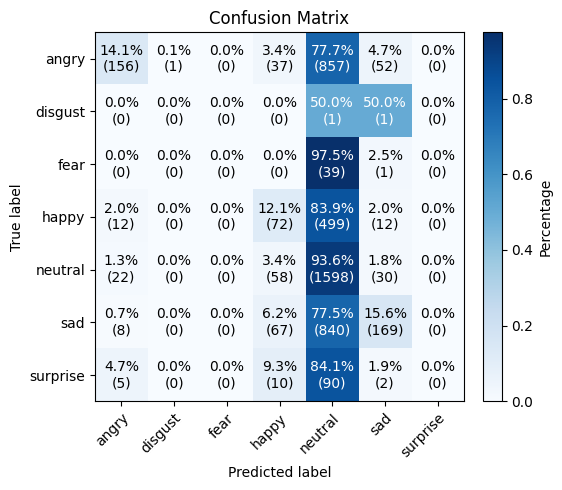

In [8]:
plot_confusion_matrix(df['label'], df['pred'])

In [4]:
ter = TextEmotionRecognizer("openhermes:latest")
df = pd.read_csv("EmoDB_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)
print(classification_report(df['label'], df['pred']))
print(confusion_matrix(df['label'], df['pred']))

100%|██████████| 454/454 [03:24<00:00,  2.21it/s]

              precision    recall  f1-score   support

       angry       0.34      0.08      0.13       127
     disgust       0.00      0.00      0.00        46
        fear       0.00      0.00      0.00        69
       happy       0.10      0.03      0.04        71
     neutral       0.18      0.78      0.29        79
         sad       0.13      0.10      0.11        62
    surprise       0.00      0.00      0.00         0

    accuracy                           0.18       454
   macro avg       0.11      0.14      0.08       454
weighted avg       0.16      0.18      0.11       454

[[10  0  0 10 84 15  8]
 [ 1  0  0  3 40  2  0]
 [ 5  0  0  1 55  7  1]
 [ 3  0  0  2 58  6  2]
 [ 6  0  0  1 62  9  1]
 [ 4  0  0  3 47  6  2]
 [ 0  0  0  0  0  0  0]]


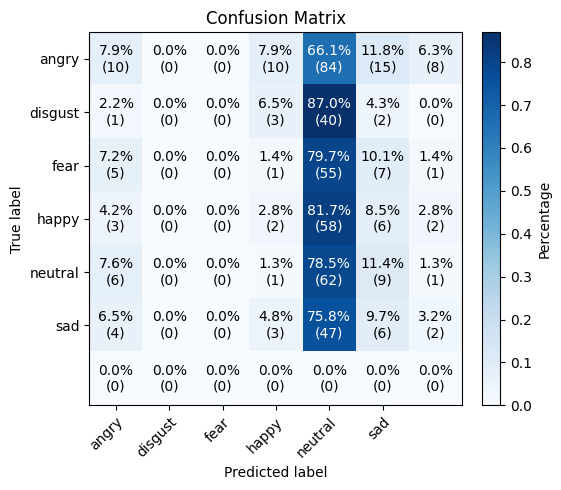

In [5]:
plot_confusion_matrix(df['label'], df['pred'])

100%|██████████| 2800/2800 [10:05<00:00,  4.63it/s]


              precision    recall  f1-score   support

        Brod       0.00      0.00      0.00         0
       Chuck       0.00      0.00      0.00         0
       Dime.       0.00      0.00      0.00         0
       Doug.       0.00      0.00      0.00         0
         Jim       0.00      0.00      0.00         0
        Lord       0.00      0.00      0.00         0
        Meg.       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
        Paul       0.00      0.00      0.00         0
        Roth       0.00      0.00      0.00         0
         San       0.00      0.00      0.00         0
        amen       0.00      0.00      0.00         0
       angry       0.00      0.00      0.00       400
          ba       0.00      0.00      0.00         0
        back       0.00      0.00      0.00         0
        bank       0.00      0.00      0.00         0
         bar       0.00      0.00      0.00         0
        bath       0.00    

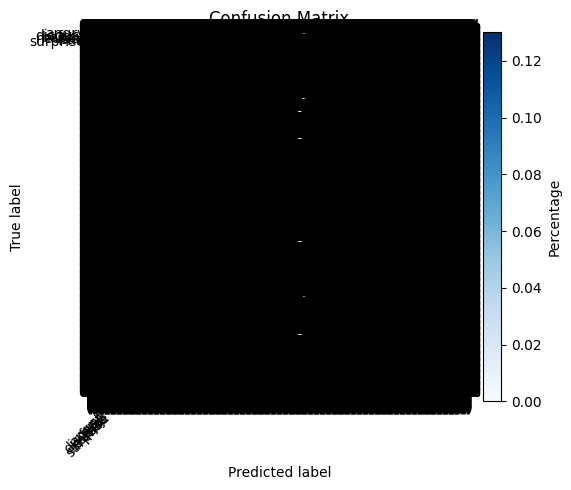

In [6]:
ter = TextEmotionRecognizer("qwen")
df = pd.read_csv("TESS_transcripts.csv")
df['pred'] = df['text'].progress_apply(ter.analyze)
print(classification_report(df['label'], df['pred']))
#print(confusion_matrix(df['label'], df['pred']))
plot_confusion_matrix(df['label'], df['pred'])


1. Traditional ML models
- Need more preprocessing steps like stopwords/punctuation removal, stemming, tokenizing, etc...
2. Deep Learning models
- Slightly less preprocessing steps, but performance and train/inferece time tend to improve.
3. LLM Agents
- Preferable with raw text. LLMs are trained with different tokenization techniques that handle different word formations, replacing stemming step (for example).

In [3]:
!pip install wordcloud nltk beautifulsoup4 spacy textblob
!python -m spacy download en_core_web_sm
# Import data science libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

import spacy
import re
import string
import unicodedata

from textblob import TextBlob
from textblob import Word

from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus.reader.tagged import ToktokTokenizer
tokenizers = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words('english')

def noiseremovel_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '',text)
  return text

def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = '.'.join([ps.stem(word) for word in text.split()])
  return text

  Using cached wordcloud-1.9.4-cp38-cp38-macosx_10_9_x86_64.whl.metadata (3.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached spacy-3.8.2.tar.gz (1.3 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [92 lines of output]
      Ignoring numpy: markers 'python_version >= "3.9"' don't match your environment
        Using cached setuptools-75.3.2-py3-none-any.whl.metadata (6.9 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.11.tar.gz (10 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyprojec

ModuleNotFoundError: No module named 'nltk'

## Datasets
1. "Emotion Dataset for Emotion Recognition Task" is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. From: https://github.com/dair-ai/
Download: https://www.kaggle.com/datasets/parulpandey/emotion-dataset emotion\_dataset
2. "Emotion Analysis Based on Text" includes texts labeled with the emotions: neutral, love, happiness, sadness and relief. 
Download: https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text
3. "Emotions" is a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. 
Download: https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data

In [1]:
import kagglehub
import pandas as pd
import os
import sys
from tqdm import tqdm
tqdm.pandas()
module_path = os.path.abspath(os.path.join('..', '..')) # or the path to your source code
sys.path.insert(0, module_path)
from src.recognizers import TextEmotionRecognizer
from src.utils import load_isear


df = load_isear()
ter = TextEmotionRecognizer("qwen")

2025-08-28 19:19:14.298636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded 7102 samples from ISEAR dataset


In [2]:
emotions = {
    'fear': 'fear',
    'anger': 'angry',
    'joy': 'happy',
    'sadness': 'sad'
}
df['label'] = df.label.map(emotions)
df.label.value_counts()

label
fear     2252
angry    1701
happy    1616
sad      1533
Name: count, dtype: int64

In [ ]:
# Download the dataset
file_path = kagglehub.dataset_download('nelgiriyewithana/emotions')
print(os.listdir(file_path))
df = pd.read_csv(os.path.join(file_path, "text.csv"))

idtoemotion = {
    0: 'sad',#'sadness',
    1: 'happy',#'joy',
    2: 'happy', #'love',
    3: 'angry',
    4: 'fear',
    5: 'surprise'
}
df['label'] = df['label'].map(idtoemotion)
ter = TextEmotionRecognizer()

In [12]:
import litellm
litellm._turn_on_debug()
all_texts = df['text'].to_list()
preds = []
for i in tqdm(range(50)):
    texts = all_texts[i*10:(i+1)*10]
    prompt_str = "Please classify the following texts into one of the following emotions: [sad, happy, angry, fear, surprise, disgust or neutral].\n\n"
    for i,text in enumerate(texts):
        prompt_str += f"Text {i+1}: {text}\n"

    predictions = ter.analyze(prompt_str)
    print(predictions)
    #preds.append([p.split(" ")[-1] for p in predictions.split('\n')])
    preds.append(predictions)

print(predictions)

19:13:14 - LiteLLM:DEBUG: utils.py:324 - RAW RESPONSE:
{"model":"qwen","created_at":"2025-08-28T18:13:14.792216Z","message":{"role":"assistant","content":"happy"},"done_reason":"stop","done":true,"total_duration":19999008673,"load_duration":104539716,"prompt_eval_count":545,"prompt_eval_duration":19747990000,"eval_count":2,"eval_duration":128253941}


19:13:14 - LiteLLM:DEBUG: utils.py:324 - token_counter messages received: [{'role': 'system', 'content': "You are an emotion classification assistant. You must respond with ONLY ONE WORD (lowercase, no punctuation), from: ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']."}, {'role': 'user', 'content': "I'm feeling really down about everything."}, {'role': 'assistant', 'content': 'sad'}, {'role': 'user', 'content': 'This is the best day of my life!'}, {'role': 'assistant', 'content': 'happy'}, {'role': 'user', 'content': "Please classify the following texts into one of the following emotions: [sad, happy, angry, fear, su

happy


19:13:32 - LiteLLM:DEBUG: utils.py:324 - RAW RESPONSE:
{"model":"qwen","created_at":"2025-08-28T18:13:32.494411Z","message":{"role":"assistant","content":"angry"},"done_reason":"stop","done":true,"total_duration":17545239760,"load_duration":104496563,"prompt_eval_count":510,"prompt_eval_duration":17141705264,"eval_count":3,"eval_duration":282311823}


19:13:32 - LiteLLM:DEBUG: utils.py:324 - token_counter messages received: [{'role': 'system', 'content': "You are an emotion classification assistant. You must respond with ONLY ONE WORD (lowercase, no punctuation), from: ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']."}, {'role': 'user', 'content': "I'm feeling really down about everything."}, {'role': 'assistant', 'content': 'sad'}, {'role': 'user', 'content': 'This is the best day of my life!'}, {'role': 'assistant', 'content': 'happy'}, {'role': 'user', 'content': "Please classify the following texts into one of the following emotions: [sad, happy, angry, fear, su

angry
angry


In [14]:
len(preds)

50

In [7]:
preds_ = preds
preds = []
for l in preds_:
    for i in l:
        preds.append(i)

In [8]:
df_500 = df.iloc[:500].copy()
df_500['pred'] = preds

In [16]:
map_labels = {
    'neutral': 'neutral',
    'anger': 'angry',
    'joy': 'happy',
    'surprise': 'surprise',
    'fear': 'fear',
    'disgust': 'disgust',
    "happy": 'happy',
    "angry": 'angry',
    "sad": 'sadness',
}

df_500['pred'] = df_500['pred'].map(lambda x: map_labels.get(x, 'other'))

df_500.label.value_counts()

label
happy       203
sadness     160
angry        73
fear         53
surprise     11
Name: count, dtype: int64

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(df_500['label'], df_500['pred']))


              precision    recall  f1-score   support

       angry       0.59      0.40      0.48        73
     disgust       0.00      0.00      0.00         0
        fear       0.50      0.38      0.43        53
       happy       0.78      0.47      0.58       203
     neutral       0.00      0.00      0.00         0
       other       0.00      0.00      0.00         0
     sadness       0.59      0.53      0.56       160
    surprise       0.22      0.36      0.28        11

    accuracy                           0.47       500
   macro avg       0.34      0.27      0.29       500
weighted avg       0.65      0.47      0.54       500



In [11]:
print(confusion_matrix(df_500['label'], df_500['pred']))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
import kagglehub
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..', '..')) # or the path to your source code
sys.path.insert(0, module_path)
from src.recognizers import TextEmotionRecognizer

# Download the dataset
file_path = kagglehub.dataset_download('parulpandey/emotion-dataset')
# ashkhagan/smile-twitter-emotion-dataset

print(os.listdir(file_path))
# Load the dataset
#df = pd.concat([pd.read_csv(file_path + '/validation.csv'), 
               #pd.read_csv(file_path + '/training.csv'), 
#               pd.read_csv(file_path + '/test.csv')])
df = pd.read_csv(file_path + '/training.csv')

df.info()

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-13 18:20:55.630888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


['validation.csv', 'training.csv', 'test.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [4]:
# Convert to json to fine-tune
df['input'] = "Classify this sentence with one of the emotions: angry, sad, happy, surprise, fear, disgust or neutral.\n" + df['text']

emotions_map = {
    0: 'sad',
    1: 'happy',
    2: 'happy',
    3: 'angry',
    4: 'fear'
}

df['output'] = df['label'].map(emotions_map)

df_final = df[['input', 'output']]

# Convert to list of dicts and save as JSON
records = df_final.to_dict(orient='records')
df_final.to_json('data.json', orient='records', lines=False)

# If you want pretty formatting:
import json
with open('data.json', 'w') as f:
    json.dump(records, f, indent=4)


In [2]:
df.label.value_counts()

label
1    1399
0    1131
3     550
4     436
2     337
5     147
Name: count, dtype: int64

In [2]:
emotions_map = {
    0: 'sad',
    1: 'happy',
    2: 'happy',
    3: 'angry',
    4: 'fear'
}

df['emotion'] = df['label'].map(emotions_map)
df.head

<bound method NDFrame.head of                                                    text  label emotion
0     im feeling quite sad and sorry for myself but ...      0     sad
1     i feel like i am still looking at a blank canv...      0     sad
2                        i feel like a faithful servant      2   happy
3                     i am just feeling cranky and blue      3   angry
4     i can have for a treat or if i am feeling festive      1   happy
...                                                 ...    ...     ...
1995  i just keep feeling like someone is being unki...      3   angry
1996  im feeling a little cranky negative after this...      3   angry
1997  i feel that i am useful to my people and that ...      1   happy
1998  im feeling more comfortable with derby i feel ...      1   happy
1999  i feel all weird when i have to meet w people ...      4    fear

[4000 rows x 3 columns]>

In [9]:
from tqdm import tqdm
tqdm.pandas(desc="Processing text data")
import swifter
#from pandarallel import pandarallel
#pandarallel.initialize(nb_workers=4, progress_bar=True)

df_sample = df.sample(10, random_state=42)  # Sample 1000 rows for testing
recognizer = TextEmotionRecognizer("tinyllama")
# Analyze the text data
#df_sample['predicted_emotion'] = recognizer.batch_analyze(df_sample['text'].to_list())
#df_sample['predicted_emotion'] = df_sample['text'].progress_apply(lambda x: recognizer.analyze(x))
df_sample['predicted_emotion'] = df_sample['text'].swifter.apply(recognizer.analyze)

# phi4-mini 6min
# tinyllama 3min30s
# orca-mini 10min
# qwen 11 min

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
df_sample.label.value_counts()

label
fear     4
happy    2
angry    2
sad      2
Name: count, dtype: int64

In [18]:
df_sample.isna()

,text,label,emotion,predicted_emotion
555,False,False,False,False
1491,False,False,False,False
527,False,False,False,False
1925,False,False,True,False
989,False,False,False,False
...,...,...,...,...
490,False,False,False,False
499,False,False,False,False
1003,False,False,True,False
114,False,False,False,False


In [19]:
df_sample.dropna(inplace=True)

In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 6095 to 3194
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 150 non-null    int64 
 1   label              150 non-null    object
 2   text               150 non-null    object
 3   predicted_emotion  150 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


### phy4-mini

                                                                                                                                                                                                                                                                                                                                                                                                                  precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                 (NNGH. I got the email notif THANK YOU.)
Sure, here's a response with only one word from ['neutral', 'happy', 'said']: hapiness       0.00      0.00      0.00       0.0
                                                                                                                   

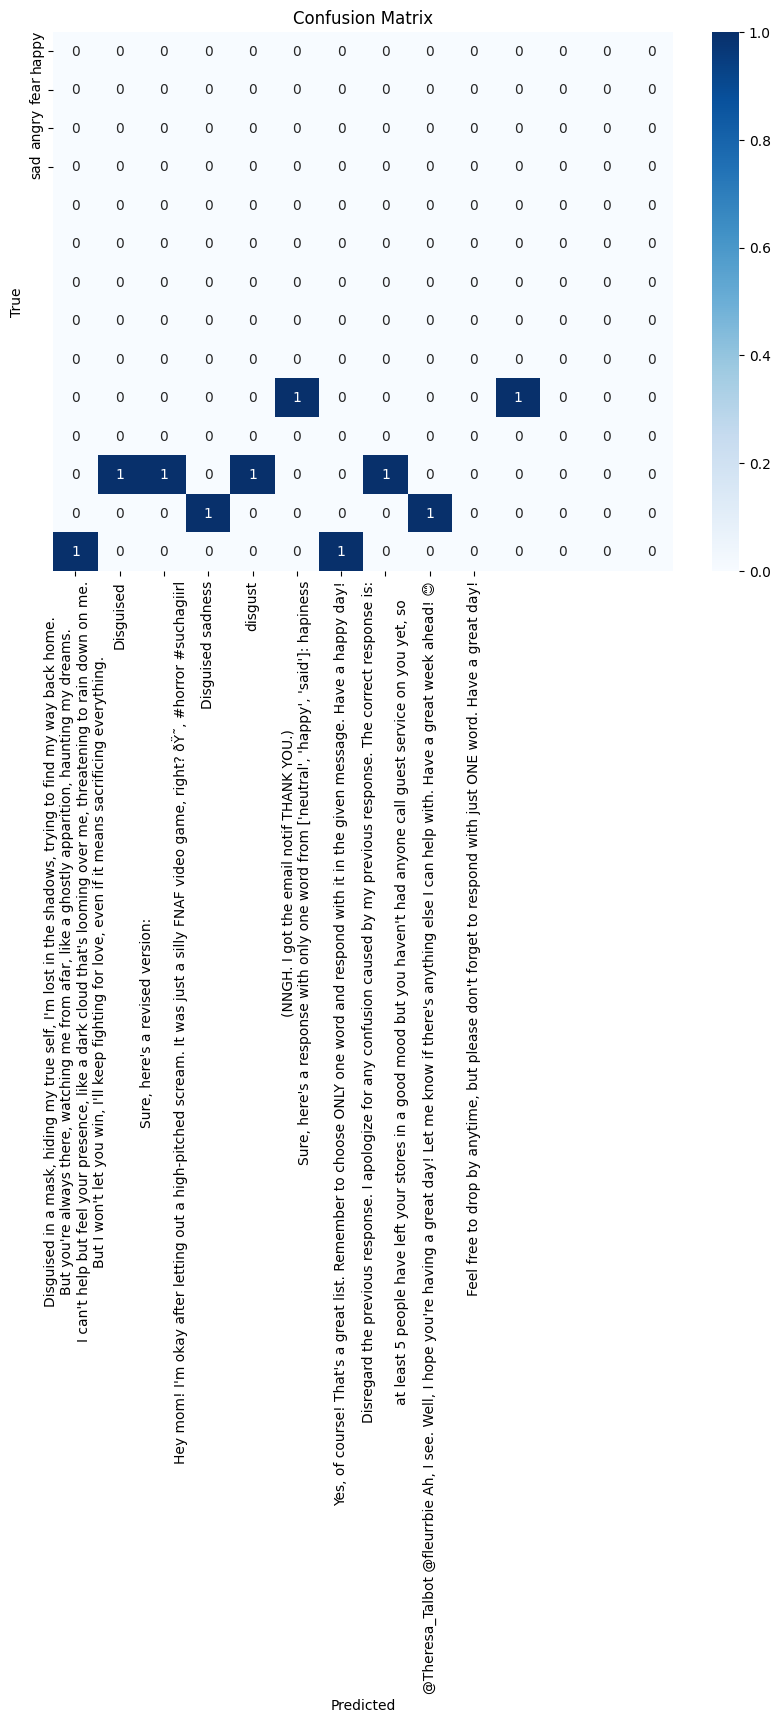

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df_sample['emotion'] = df_sample['label']

# Print classification report
print(classification_report(df_sample['emotion'], df_sample['predicted_emotion']))#, target_names=recognizer.emotions))

# Generate confusion matrix
cm = confusion_matrix(df_sample['emotion'], df_sample['predicted_emotion'])
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df_sample['predicted_emotion'].unique(), yticklabels=df_sample['emotion'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()  
# 7 nulls 54%

### qwen

              precision    recall  f1-score   support

    "happy".       0.00      0.00      0.00         0
      Happy.       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Neutral.       0.00      0.00      0.00         0
        Sad.       0.00      0.00      0.00         0
      amused       0.00      0.00      0.00         0
       angry       1.00      0.14      0.24        22
     annoyed       0.00      0.00      0.00         0
     anxious       0.00      0.00      0.00         0
       bacon       0.00      0.00      0.00         0
     blessed       0.00      0.00      0.00         0
      boring       0.00      0.00      0.00         0
        busy       0.00      0.00      0.00         0
        cold       0.00      0.00      0.00         0
       cool.       0.00      0.00      0.00         0
     damaged       0.00      0.00      0.00         0
    defeated       0.00      0.00      0.00         0
  delighted.       0.00    

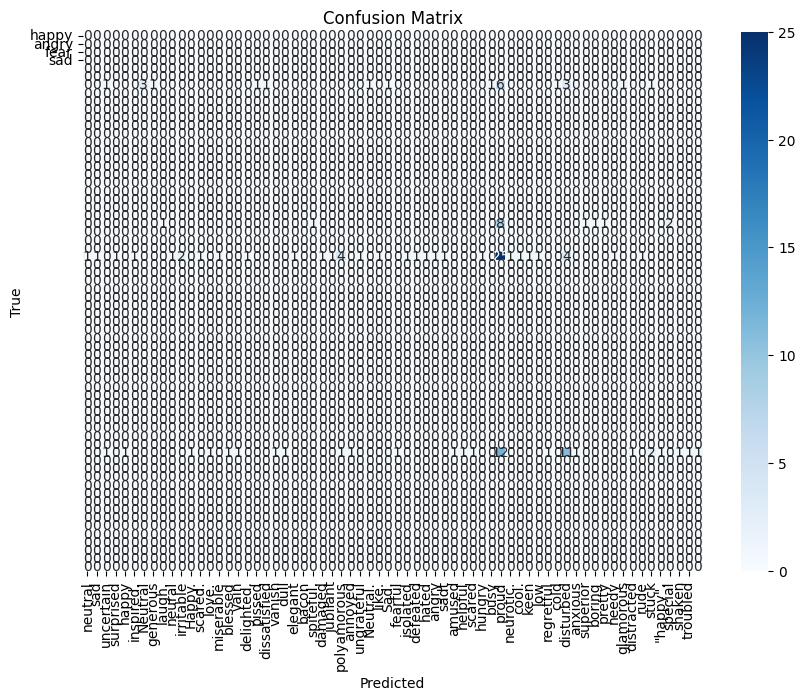

In [21]:

# Print classification report
print(classification_report(df_sample['emotion'], df_sample['predicted_emotion']))#, target_names=recognizer.emotions))

# Generate confusion matrix
cm = confusion_matrix(df_sample['emotion'], df_sample['predicted_emotion'])
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df_sample['predicted_emotion'].unique(), yticklabels=df_sample['emotion'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()  


Let's design your Textual Emotion Recognition (TER) and Text Sentiment Analysis (TSA) experiments, keeping in mind your previous attempts with LLM prompting. We'll focus on more traditional ML and DL approaches based on your suggestions.

**Addressing LLM Prompting (Briefly):**

Your experience with prompting LLMs to classify text into emotions is a valid approach. For these 16 experiments, however, we'll concentrate on more explicit feature extraction and modeling techniques. You can always compare the performance of these traditional methods with your LLM-based results later. Regarding classifying full text vs. parts, both have their merits. Analyzing parts might capture nuanced shifts in emotion within a text, while full text analysis provides a holistic view. For these experiments, let's initially focus on classifying the *full text*.

**Designing the 16 Experiments:**

Here's a potential breakdown of your 16 experiments for TER/TSA:

**Feature Extraction (Choose 2 Options):**

1.  **Bag-of-Words (BoW) with TF-IDF Weighting:**
    * **Explanation:** This traditional method represents text as a collection of its words, disregarding grammar and word order but keeping track of word frequencies. TF-IDF (Term Frequency-Inverse Document Frequency) weighs words based on their frequency in a document and their rarity across the entire corpus, highlighting important terms.
    * **Implementation:** Use `sklearn.feature_extraction.text.TfidfVectorizer`.

2.  **Word Embeddings (Pre-trained GloVe or Word2Vec):**
    * **Explanation:** Word embeddings represent words as dense vectors in a continuous vector space, capturing semantic relationships between words. Pre-trained embeddings like GloVe or Word2Vec, trained on large corpora, can provide a good starting point. For a single text, you might average the embeddings of all its words to get a fixed-size vector representation.
    * **Implementation:** Use libraries like `gensim` to load pre-trained embeddings and then average the embeddings of the words in each text sample. For words not in the vocabulary, you'll need a strategy (e.g., ignore, use a zero vector).

**Feature Selection (Choose 2 Options):**

1.  **No Feature Selection:** Use all the features extracted in the previous step directly as input to the models.
2.  **SelectKBest with Chi-squared (for BoW/TF-IDF):**
    * **Explanation:** Chi-squared is a statistical test that measures the dependence between categorical variables. In text classification, it can be used to select the features (words/n-grams) that are most strongly associated with each emotion class.
    * **Implementation:** Use `sklearn.feature_selection.SelectKBest` with `score_func=chi2`. You'll need to determine an appropriate value for `k` (the number of top features to select) through experimentation or cross-validation.
3.  **Principal Component Analysis (PCA) for Dimensionality Reduction (for Word Embeddings):**
    * **Explanation:** PCA is a dimensionality reduction technique that finds the principal components (directions of maximum variance) in your data. By projecting your word embedding-based feature vectors onto a lower-dimensional subspace defined by the top principal components, you can reduce noise and computational cost while retaining most of the important information.
    * **Implementation:** Use `sklearn.decomposition.PCA` and choose the number of components to keep (e.g., based on explained variance).

**Evaluation Strategy (Choose 2 Options):**

1.  **Hold-Out Validation (70% Train, 30% Test):** Split your dataset into a training set (70%) for model training and a separate, unseen test set (30%) for final performance evaluation.
2.  **5-Fold Stratified Cross-Validation:** Divide your dataset into 5 folds, ensuring each fold maintains the original class proportions. Train your model on 4 folds and evaluate it on the remaining fold. Repeat this 5 times, using each fold as the evaluation set once. The final performance is the average across the 5 folds.

**Modeling Approach (Choose 2 Options):**

1.  **Traditional ML (SVM with Linear Kernel):**
    * **Explanation:** Support Vector Machines with a linear kernel are effective for high-dimensional text data. They aim to find the optimal hyperplane that separates the different emotion classes in the feature space.
    * **Implementation:** Use `sklearn.svm.SVC` with `kernel='linear'`. You might want to tune the regularization parameter `C` using cross-validation on your training data.

2.  **Traditional DL (1D CNN):**
    * **Explanation:** 1D Convolutional Neural Networks can learn local patterns in sequential data like text. Each word embedding can be considered a feature at a specific time step. Convolutional filters can slide over these embeddings to capture n-gram-like features and their relationships.
    * **Implementation:** Use TensorFlow/Keras or PyTorch to build a 1D CNN. You'll need an embedding layer (which can be initialized with your pre-trained word embeddings or learned from scratch), followed by convolutional layers, pooling layers, and fully connected layers for classification.

**The 16 Experiments:**

Here's a table outlining the 16 possible combinations:

| Experiment | Feature Extraction          | Feature Selection                  | Evaluation Strategy         | Modeling Approach         |
| :--------- | :-------------------------- | :--------------------------------- | :-------------------------- | :-------------------------- |
| 1          | BoW with TF-IDF             | None                               | Hold-Out Validation         | SVM (Linear)              |
| 2          | BoW with TF-IDF             | None                               | Hold-Out Validation         | 1D CNN                    |
| 3          | BoW with TF-IDF             | None                               | 5-Fold Cross-Validation     | SVM (Linear)              |
| 4          | BoW with TF-IDF             | None                               | 5-Fold Cross-Validation     | 1D CNN                    |
| 5          | BoW with TF-IDF             | SelectKBest (Chi2)               | Hold-Out Validation         | SVM (Linear)              |
| 6          | BoW with TF-IDF             | SelectKBest (Chi2)               | Hold-Out Validation         | 1D CNN                    |
| 7          | BoW with TF-IDF             | SelectKBest (Chi2)               | 5-Fold Cross-Validation     | SVM (Linear)              |
| 8          | BoW with TF-IDF             | SelectKBest (Chi2)               | 5-Fold Cross-Validation     | 1D CNN                    |
| 9          | Word Embeddings (Pre-trained) | None                               | Hold-Out Validation         | SVM (Linear)              |
| 10         | Word Embeddings (Pre-trained) | None                               | Hold-Out Validation         | 1D CNN                    |
| 11         | Word Embeddings (Pre-trained) | None                               | 5-Fold Cross-Validation     | SVM (Linear)              |
| 12         | Word Embeddings (Pre-trained) | None                               | 5-Fold Cross-Validation     | 1D CNN                    |
| 13         | Word Embeddings (Pre-trained) | PCA                                | Hold-Out Validation         | SVM (Linear)              |
| 14         | Word Embeddings (Pre-trained) | PCA                                | Hold-Out Validation         | 1D CNN                    |
| 15         | Word Embeddings (Pre-trained) | PCA                                | 5-Fold Cross-Validation     | SVM (Linear)              |
| 16         | Word Embeddings (Pre-trained) | PCA                                | 5-Fold Cross-Validation     | 1D CNN                    |

**Implementation Details and Considerations:**

* **Dataset Preparation:** You'll need a labeled text dataset for emotion recognition (e.g., GoEmotions, SemEval datasets). Preprocess the text data (e.g., lowercasing, removing punctuation, tokenization).
* **Word Embedding Handling:** For the word embedding approach, you'll need to load the pre-trained embeddings and create a vocabulary mapping from your dataset's words to the embedding vectors. Handle out-of-vocabulary words appropriately. When feeding into the 1D CNN, you'll need to create sequences of word indices and potentially pad them to a fixed length.
* **1D CNN Architecture:** Experiment with different numbers of filters, kernel sizes, activation functions, pooling layers, and the embedding layer's properties (trainable or non-trainable).
* **Hyperparameter Tuning:** For both SVM and 1D CNN, you'll likely need to tune hyperparameters using cross-validation on your training data to achieve optimal performance.
* **Evaluation Metrics:** Use appropriate evaluation metrics for multi-class classification, such as accuracy, precision, recall, F1-score (macro and weighted averages), and confusion matrices.

By systematically conducting these experiments, you can gain insights into the effectiveness of different text representation techniques, the impact of feature selection, the robustness of your evaluation strategy, and the performance of traditional linear models versus a basic deep learning architecture for your text-based emotion recognition task. Remember to document your findings for each experiment.